In [1]:
# Importing the libraries
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',
                                one_hot=True, reshape=False)

W0618 06:44:18.641337 139686117050240 deprecation.py:323] From <ipython-input-2-5c7f9ee034f2>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0618 06:44:18.642507 139686117050240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0618 06:44:18.646716 139686117050240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting data/fashion/train-images-idx3-ubyte.gz


W0618 06:44:18.944797 139686117050240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0618 06:44:18.947558 139686117050240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0618 06:44:19.005390 139686117050240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [0]:
label_to_class = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3:  'Dress',
    4: 'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:  'Bag',
    9:  'Ankle boot'
}

In [0]:
train_images = fashion_mnist.train.images
train_labels = fashion_mnist.train.labels

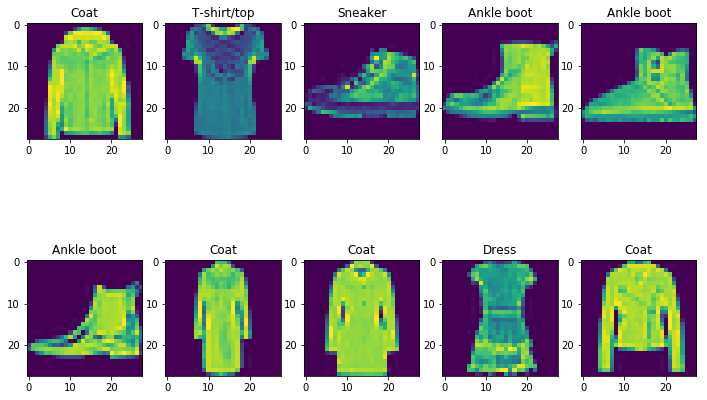

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(12, 8))
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(train_images[i * 5 + j].reshape(28, 28))
        ax[i][j].set_title(label_to_class[train_labels[i * 5 + j].argmax()])
plt.show()

In [0]:
# Rotating the image by an angle around center of the image
def rotateImage_by_thirty(image, angle=30, scale=1.0):
    row,col = image.shape
    center=tuple(np.array([row,col])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle, scale)
    new_image = cv2.warpAffine(image, rot_mat, (col,row))
    return new_image

In [0]:
# Rotating the image by an angle around center of the image
def rotateImage_by_neg_thirty(image, angle=-30, scale=1.0):
    row,col = image.shape
    center=tuple(np.array([row,col])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle, scale)
    new_image = cv2.warpAffine(image, rot_mat, (col,row))
    return new_image

In [0]:
# Horizontal Flip
def horizontal_flip(img):
    return cv2.flip(img, 1)

In [0]:
# vertical Flip
def vertical_flip(img):
    return cv2.flip(img, 0)

In [0]:
img = train_images[0].reshape(28, 28)

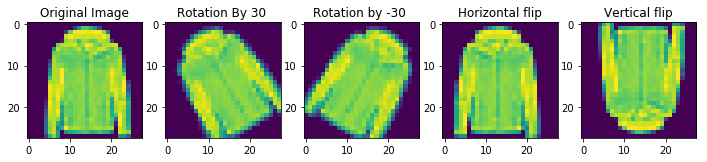

In [11]:
# Plotting the augmented images
fig, ax = plt.subplots(1, 5, figsize=(12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(rotateImage_by_thirty(img))
ax[1].set_title('Rotation By 30 ')
ax[2].imshow(rotateImage_by_neg_thirty(img))
ax[2].set_title('Rotation by -30 ')
ax[3].imshow(horizontal_flip(img))
ax[3].set_title('Horizontal flip')
ax[4].imshow(vertical_flip(img))
ax[4].set_title('Vertical flip')
plt.show()

In [0]:
# Applying augmentation on the images
augmented_images = []
augmented_labels = []
for i in range(len(train_images)):
    augmented_images.append(vertical_flip(np.squeeze(train_images[i])))
    augmented_labels.append(train_labels[i])
    augmented_images.append(horizontal_flip(np.squeeze(train_images[i])))
    augmented_labels.append(train_labels[i])
    augmented_images.append(rotateImage_by_thirty(np.squeeze(train_images[i])))
    augmented_labels.append(train_labels[i])
    augmented_images.append(rotateImage_by_neg_thirty(np.squeeze(train_images[i])))
    augmented_labels.append(train_labels[i])

In [0]:
# combining original images with augmented images
x_train = np.concatenate((train_images, np.array(augmented_images).reshape(len(augmented_images), 28, 28, 1)))
y_train = np.concatenate((train_labels, np.array(augmented_labels)))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1e-100, random_state=101)

In [0]:
# Creating Placeholders for input
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name='Images')
y = tf.placeholder(dtype=tf.float32, shape=[None, y_train.shape[1]], name='Labels')
keep_prob = tf.placeholder(dtype=tf.float32)

In [0]:
# Defining the weights and biases
weights = {
    'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 32])),
    'wc2': tf.Variable(tf.truncated_normal([3, 3, 32, 64])),
    'wc3': tf.Variable(tf.truncated_normal([3, 3, 64, 64])),
    'wc4': tf.Variable(tf.truncated_normal([3, 3, 64, 128])),
    'wd1': tf.Variable(tf.truncated_normal([7 * 7 * 128, 1024])),
    'wd2': tf.Variable(tf.truncated_normal([1024, 256])),
    'out': tf.Variable(tf.truncated_normal([256, 10]))}

biases = {
    'bc1': tf.Variable(tf.truncated_normal([32])),
    'bc2': tf.Variable(tf.truncated_normal([64])),
    'bc3': tf.Variable(tf.truncated_normal([64])),
    'bc4': tf.Variable(tf.truncated_normal([128])),
    'bd1': tf.Variable(tf.truncated_normal([1024])),
    'bd2': tf.Variable(tf.truncated_normal([256])),
    'out': tf.Variable(tf.truncated_normal([10]))}

In [0]:
# Conv2D and MaxPool2D
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [0]:
# Defining the model
def conv_net(x, weights, biases, keep_prob):
    # Conv1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Batch Normalization
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.layers.batch_normalization(conv1)
    
    # Conv2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Batch Normalization
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.layers.batch_normalization(conv2)
    
    # MaxPooling
    conv2 = maxpool2d(conv2, k=2)
    # Conv3
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Batch Normalization
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.layers.batch_normalization(conv3)
    
    # Conv4
    conv4 = conv2d(conv3, weights['wc4'], biases['bc4'])
    # Batch Normalization
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.layers.batch_normalization(conv4)
    
    # MaxPooling
    conv4 = maxpool2d(conv4, k=2)
    
    # Fully connected layer 
    fc1 = tf.reshape(conv4, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.layers.batch_normalization(fc1)
    # Dropout Layer
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2']))
    fc2 = tf.layers.batch_normalization(fc2)
    # Dropout Layer
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # Output Layer
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return out

In [0]:
# Parameters
learning_rate = 1e-4
epochs = 10
batch_size = 64
n_classes = 10
test_valid_size = 256
prob = 1.0

In [0]:
x_train = fashion_mnist.train.images
y_train = fashion_mnist.train.labels

In [24]:
# Model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Model checkpoint
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for i in range(len(x_train)//batch_size):
            #batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
            batch_x = x_train[i * batch_size: (i + 1) * batch_size]
            batch_y = y_train[i * batch_size: (i + 1) * batch_size]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: prob})

            # Calculate batch loss and accuracy
            loss, train_acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob: prob})
            valid_acc = sess.run(accuracy, feed_dict={
                x: fashion_mnist.validation.images[:test_valid_size],
                y: fashion_mnist.validation.labels[:test_valid_size], keep_prob: prob})

            print('Epoch {:>2}, Batch {:>3} - train_acc: {:>10.4f} Valid_acc: {:.6f}'.format(
                epoch + 1,
                i + 1,
                train_acc,
                valid_acc))

    # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
        x: fashion_mnist.test.images[:test_valid_size],
        y: fashion_mnist.test.labels[:test_valid_size],
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))
    saver.save(sess, 'model_adv.cpkt')

W0618 06:48:47.495199 139686117050240 deprecation.py:323] From <ipython-input-21-6ba6579f6311>:6: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
W0618 06:48:47.659542 139686117050240 deprecation.py:506] From <ipython-input-21-6ba6579f6311>:37: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0618 06:48:47.706111 139686117050240 deprecation.py:323] From <ipython-input-24-88491943280f>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future versio

Epoch  1, Batch   1 - train_acc:     0.1719 Valid_acc: 0.167969
Epoch  1, Batch   2 - train_acc:     0.2188 Valid_acc: 0.183594
Epoch  1, Batch   3 - train_acc:     0.2031 Valid_acc: 0.175781
Epoch  1, Batch   4 - train_acc:     0.1562 Valid_acc: 0.167969
Epoch  1, Batch   5 - train_acc:     0.1250 Valid_acc: 0.160156
Epoch  1, Batch   6 - train_acc:     0.1562 Valid_acc: 0.136719
Epoch  1, Batch   7 - train_acc:     0.1250 Valid_acc: 0.132812
Epoch  1, Batch   8 - train_acc:     0.1250 Valid_acc: 0.128906
Epoch  1, Batch   9 - train_acc:     0.2188 Valid_acc: 0.128906
Epoch  1, Batch  10 - train_acc:     0.1406 Valid_acc: 0.125000
Epoch  1, Batch  11 - train_acc:     0.1094 Valid_acc: 0.128906
Epoch  1, Batch  12 - train_acc:     0.0938 Valid_acc: 0.125000
Epoch  1, Batch  13 - train_acc:     0.0938 Valid_acc: 0.128906
Epoch  1, Batch  14 - train_acc:     0.1250 Valid_acc: 0.125000
Epoch  1, Batch  15 - train_acc:     0.1094 Valid_acc: 0.132812
Epoch  1, Batch  16 - train_acc:     0.1

In [29]:
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [30]:
x

<tf.Tensor 'Images:0' shape=(?, 28, 28, 1) dtype=float32>

In [32]:
keep_prob

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [33]:
# Loading the model from checkpoint
with tf.Session() as sess:
  # Restore variables from disk.
    saver = tf.train.import_meta_graph('model_adv.cpkt.meta')
    saver.restore(sess, "model_adv.cpkt")
    print("Model restored.")
    #saver.recover_last_checkpoints('model.cpkt')
#     test_acc = sess.run(accuracy, feed_dict={
#         x: fashion_mnist.test.images[:test_valid_size],
#         y: fashion_mnist.test.labels[:test_valid_size]})
    graph = tf.get_default_graph()
    accuracy = graph.get_tensor_by_name("Mean_1:0")
    x = graph.get_tensor_by_name('Images:0')
    y = graph.get_tensor_by_name('Labels:0')
    keep_prob = graph.get_tensor_by_name('Placeholder:0')
    print('Testing Accuracy: {}'.format(sess.run(accuracy, feed_dict={x: fashion_mnist.test.images[:test_valid_size],
                                                                y: fashion_mnist.test.labels[:test_valid_size], keep_prob: 1.})))

Model restored.
Testing Accuracy: 0.83203125
